### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [37]:
import numpy as np
import pandas as pd


vehicle_dataset = pd.read_csv('vehicle.csv').dropna();
vehicle_dataset.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [38]:
vehicle_dataset.shape

# this confirms that few records with na have been dropped.

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

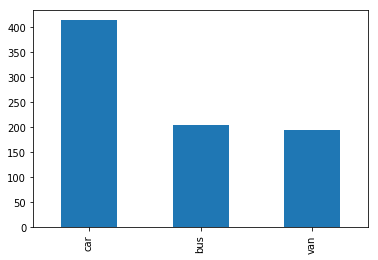

In [39]:
pd.value_counts(vehicle_dataset['class']).plot.bar()

### Check for any missing values in the data 

In [40]:
vehicle_dataset.info()

# This shows all columns have 813 records and hence no missing values.
# Also we removed the NA in the first question.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [41]:
vehicle_dataset.isnull().sum()

# This also confirm that there are no missing values.

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

In [42]:
# seperating the class column from the dataset as this is a terget column.
Y = vehicle_dataset['class'] 
X = vehicle_dataset.drop('class', axis=1)
print(Y.shape)
print(X.shape)

(813,)
(813, 18)


In [43]:
# Now Standardizing the data  the data using z score

from scipy.stats import zscore

# vehicle_dataset = vehicle_dataset.apply(zscore)
vehicle_dataset = (X - X.mean())/X.std()
vehicle_dataset.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163130,0.520088,0.060631,0.264807,1.282465,0.299536,-0.198395,0.129568,-0.217017,0.765840,-0.397153,-0.338805,0.301491,-0.320995,-0.071479,0.371059,-0.321611,0.171731
1,-0.322675,-0.618742,0.123990,-0.835879,-0.598885,0.085732,-0.591356,0.514017,-0.605641,-0.337255,-0.589671,-0.618373,-0.502662,-0.053472,0.538094,0.147018,0.003398,0.442046
2,1.256192,0.845468,1.517889,1.187003,0.529925,0.299536,1.161854,-1.151928,0.948854,0.696897,1.110907,1.121795,1.414933,0.080290,1.554049,-0.413084,-0.159106,0.036574
3,-0.079772,-0.618742,-0.002728,-0.300410,0.153655,0.085732,-0.742495,0.642167,-0.605641,-0.337255,-0.910535,-0.738188,-1.461460,-1.257325,-0.071479,-0.301063,1.628442,1.523305
4,-1.051383,-0.130672,-0.763036,1.068010,5.170587,9.279317,-0.591356,0.514017,-0.605641,-0.268311,1.688462,-0.646901,0.425207,7.303409,0.538094,-0.189043,-1.459141,-1.720472


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

### K - Means Clustering

### 4. Plotting Elbow/ Scree Plot

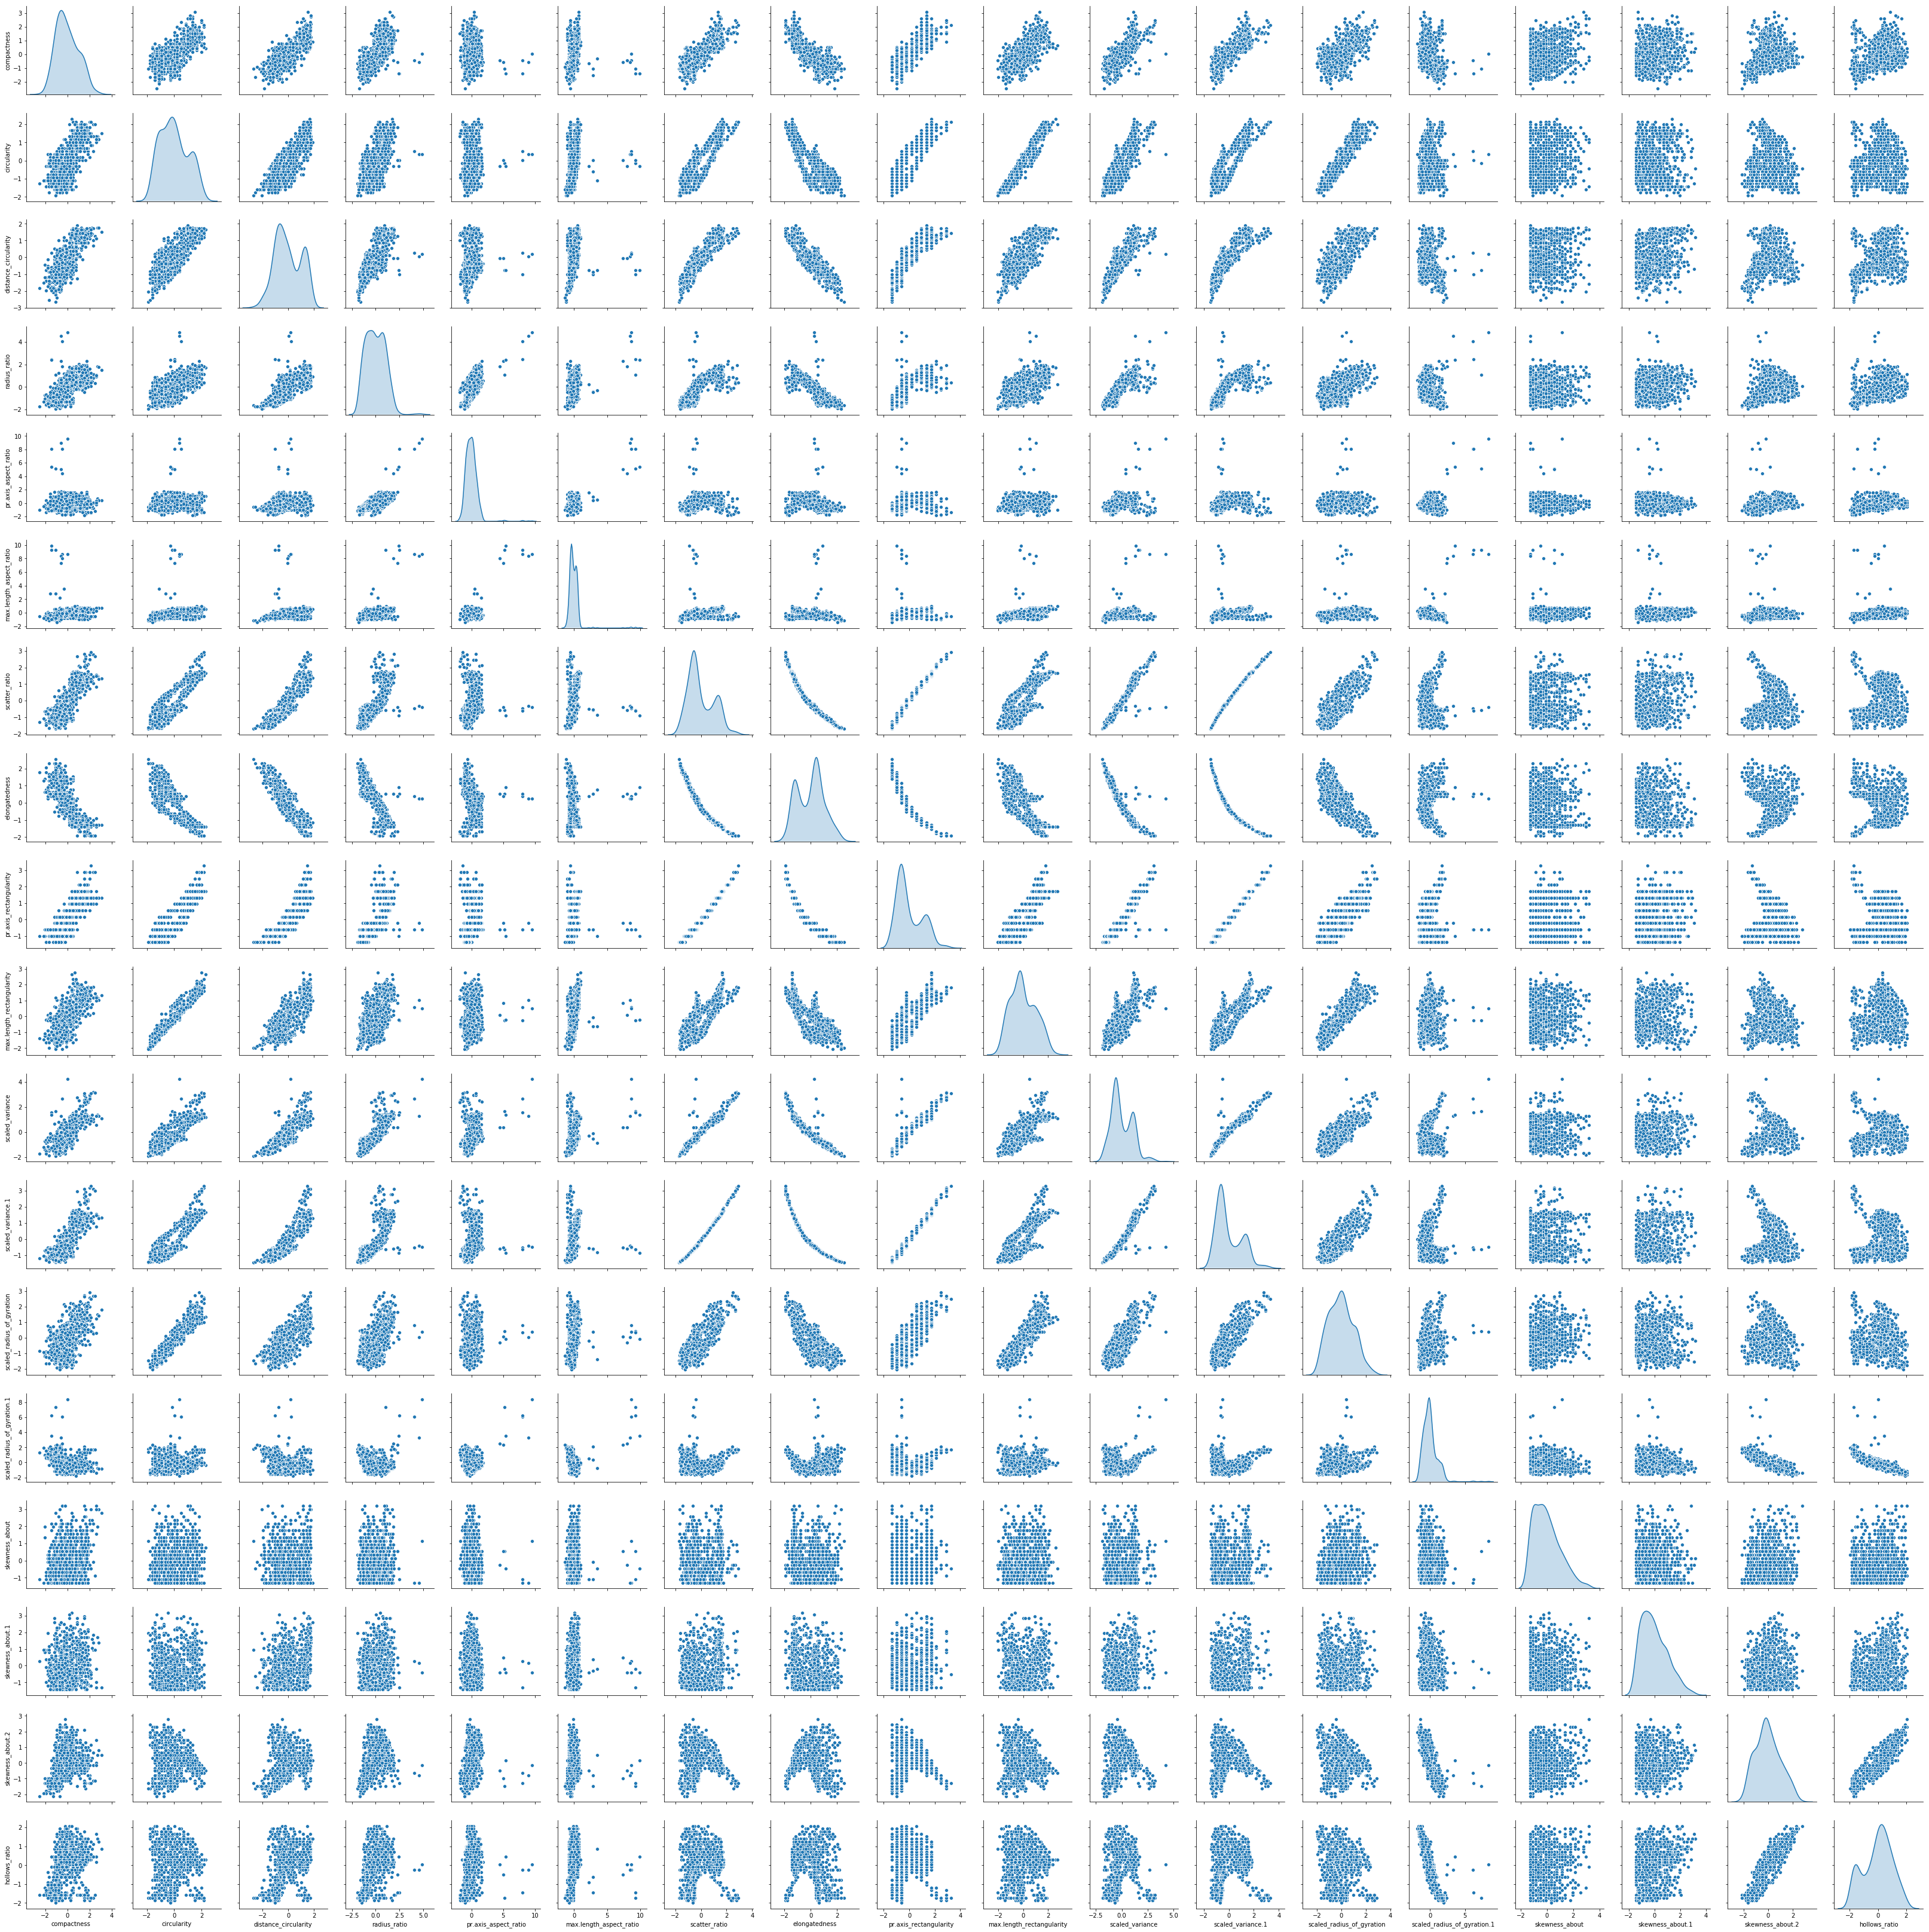

In [45]:
# First let us do a pair plot analysis to visually check number of likely clusters

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

sns.pairplot(vehicle_dataset, diag_kind='kde')   

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

In [ ]:
# While checking the Pair plots for various columns like for circularity, radias_ratio we can easily say that there 
# could be 3 clusters. 

### Find out the optimal value of K

In [49]:
from sklearn.cluster import KMeans

cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(vehicle_dataset)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,8612.530411
1,3,7028.811223
2,4,5734.395214
3,5,5179.438657
4,6,4715.015669
5,7,4344.286369
6,8,4082.117956
7,9,3841.963814


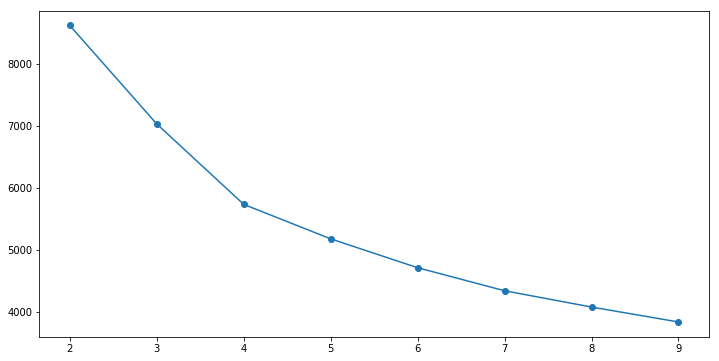

In [50]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# The elbow plot confirms our visual analysis that there are likely 4 good clusters

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [51]:
cluster = KMeans( n_clusters = 4, random_state = 2354)
cluster.fit(vehicle_dataset)
vehicle_dataset_copy = vehicle_dataset.copy(deep = True)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [52]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.15371766e+00,  1.18355790e+00,  1.21124130e+00,
         9.72722989e-01,  9.48629436e-02,  2.18524624e-01,
         1.29716994e+00, -1.21349967e+00,  1.30104369e+00,
         1.09763028e+00,  1.20516071e+00,  1.30818139e+00,
         1.09054160e+00, -1.07812279e-01,  1.68222709e-01,
         2.67789999e-01,  4.66756556e-03,  1.90209918e-01],
       [-2.25199629e-01, -5.73989391e-01, -3.07425110e-01,
        -3.81630722e-02,  1.81662263e-01, -1.72355289e-01,
        -4.55282114e-01,  3.19926379e-01, -4.83645892e-01,
        -5.36275694e-01, -4.20308985e-01, -4.59949644e-01,
        -6.03456492e-01, -6.43926842e-01, -6.09580536e-02,
         4.54561310e-03,  8.24334283e-01,  7.07549562e-01],
       [-9.16268534e-01, -5.25873427e-01, -8.87114109e-01,
        -1.08663190e+00, -5.62825504e-01, -3.00897343e-01,
        -7.79649580e-01,  8.66962400e-01, -7.46517080e-01,
        -4.89791878e-01, -8.00906388e-01, -7.83618105e-01,
        -3.93379810e-01,  7.78636126e-01, -9.17983834e

### 5. Store the centroids in a dataframe with column names from the original dataset given 

In [54]:
centroid_df = pd.DataFrame(centroids, columns = list(vehicle_dataset))
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.153718,1.183558,1.211241,0.972723,0.094863,0.218525,1.297170,-1.213500,1.301044,1.097630,1.205161,1.308181,1.090542,-0.107812,0.168223,0.267790,0.004668,0.190210
1,-0.225200,-0.573989,-0.307425,-0.038163,0.181662,-0.172355,-0.455282,0.319926,-0.483646,-0.536276,-0.420309,-0.459950,-0.603456,-0.643927,-0.060958,0.004546,0.824334,0.707550
2,-0.916269,-0.525873,-0.887114,-1.086632,-0.562826,-0.300897,-0.779650,0.866962,-0.746517,-0.489792,-0.800906,-0.783618,-0.393380,0.778636,-0.091798,-0.283793,-1.042724,-1.098748
3,-0.732573,0.072690,-0.272004,2.945870,6.832446,8.691355,-0.534679,0.465961,-0.557063,0.283236,1.696483,-0.587706,0.212570,4.962583,-0.274670,-0.231051,-0.707559,-0.453372


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [56]:
cluster.labels_

array([1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0,
       1, 2, 0, 0, 2, 1, 1, 1, 0, 1, 2, 3, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2,
       2, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0,
       1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 0,
       2, 2, 0, 2, 3, 1, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 2, 1, 0, 0, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 3, 2, 1, 2, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 0,
       1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1,
       0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1,
       0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2,
       1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2,
       1, 0, 2, 1, 3, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 2, 1, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2,

## Hierarchical Clustering 

### 6. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [179]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [180]:
# Checking shapes of these datasets

print(a.shape)
print(b.shape)
print(c.shape)

(100, 2)
(50, 2)
(100, 2)


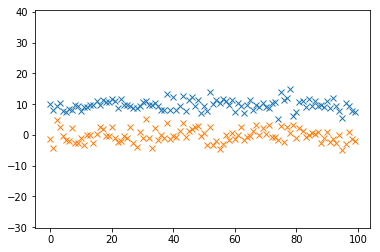

In [181]:
# Trying to visualize how these datasets looks like

plt.plot(a, 'x')
plt.axis('equal')
plt.show()

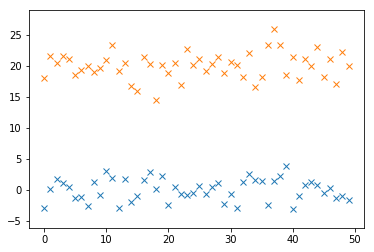

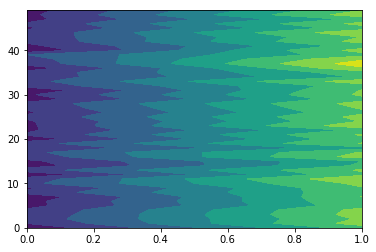

In [182]:
# Another way of visualizing this data is as shown below.

plt.plot(b, 'x')
plt.axis('equal')
plt.show()

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.contourf(b)

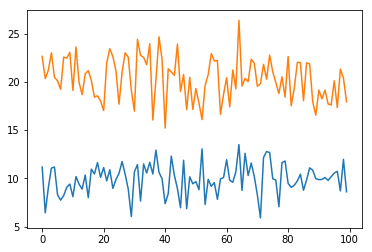

In [183]:
# Another way of visualizing this data is as shown below.

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(c)

### 7. Combine all three arrays a,b,c into a dataframe

In [184]:
a_df = pd.DataFrame(a).append(pd.DataFrame(b)).append(pd.DataFrame(c))
a_df.shape

(250, 2)

### 8. Use scatter matrix to print all the 3 distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002B369CF8>,
      dtype=object)

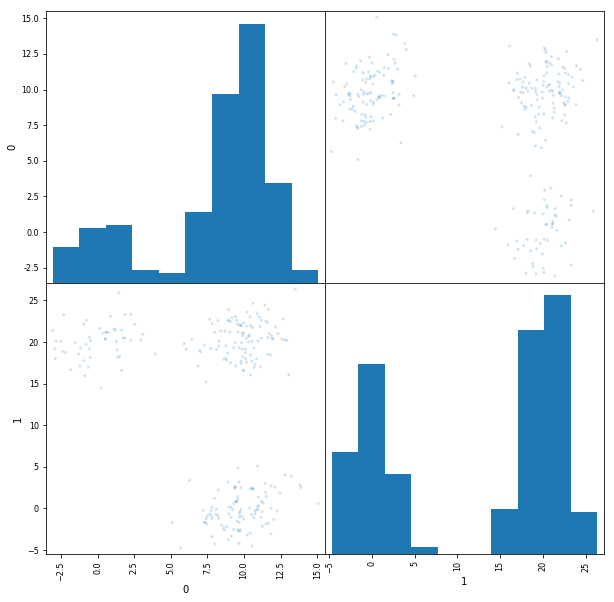

In [185]:
from pandas.plotting import scatter_matrix

scatter_matrix(a_df, alpha=0.2, figsize=(10, 10))

In [186]:
a_df.shape

(250, 2)

### 9. Find out the linkage matrix

C:\Users\a0708440\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


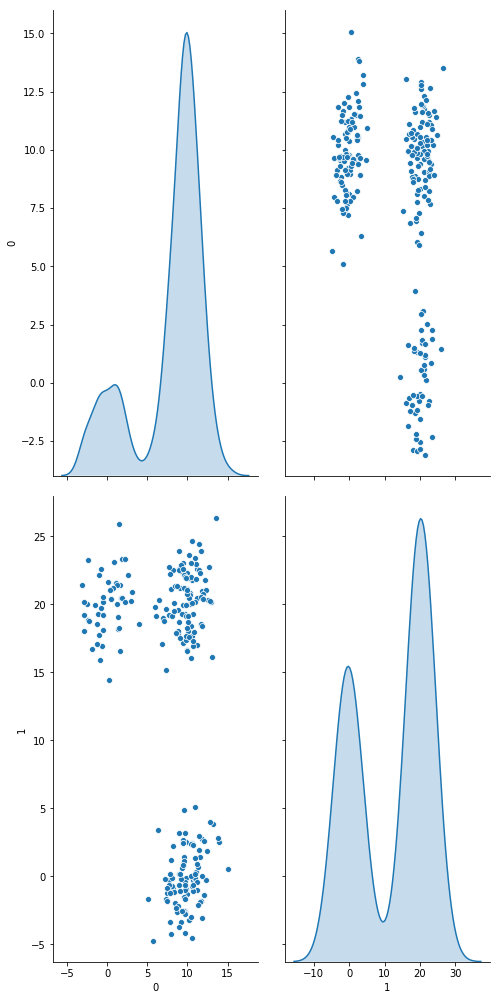

In [187]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering 

sns.pairplot(a_df, size=7,aspect=0.5 , diag_kind='kde')

matrix = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='ward')

Use ward as linkage metric and distance as Eucledian

In [188]:
matrix.fit(a_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func='deprecated')

In [189]:
a_df['labels'] = matrix.labels_

a_df.groupby(["labels"]).count()

,0,1
labels,,
0,65,65
1,45,45
2,25,25
3,56,56
4,35,35
5,24,24


In [190]:
a_df = a_df.groupby(['labels'])

In [191]:

a_df=a_df.head(250)

Z = linkage(a_df, 'ward')
Z

array([[4.70000000e+01, 6.20000000e+01, 1.10128238e-02, 2.00000000e+00],
       [1.21000000e+02, 1.27000000e+02, 3.63422055e-02, 2.00000000e+00],
       [1.71000000e+02, 2.33000000e+02, 4.10174084e-02, 2.00000000e+00],
       [1.04000000e+02, 1.25000000e+02, 4.81772010e-02, 2.00000000e+00],
       [5.00000000e+00, 6.30000000e+01, 5.34010789e-02, 2.00000000e+00],
       [2.90000000e+01, 9.70000000e+01, 6.34428153e-02, 2.00000000e+00],
       [2.10000000e+02, 2.48000000e+02, 7.14535554e-02, 2.00000000e+00],
       [3.40000000e+01, 8.10000000e+01, 7.80916091e-02, 2.00000000e+00],
       [2.08000000e+02, 2.39000000e+02, 8.14069399e-02, 2.00000000e+00],
       [1.40000000e+01, 8.80000000e+01, 8.72457443e-02, 2.00000000e+00],
       [5.00000000e+01, 2.55000000e+02, 9.76405703e-02, 3.00000000e+00],
       [1.73000000e+02, 1.78000000e+02, 1.05585789e-01, 2.00000000e+00],
       [1.90000000e+01, 5.70000000e+01, 1.10010410e-01, 2.00000000e+00],
       [2.36000000e+02, 2.52000000e+02, 1.26413830e

In [196]:
c, coph_dists = cophenet(Z , pdist(a_df))

c 

0.9537958340190891

### 10. Plot the dendrogram for the consolidated dataframe

In [192]:
Z.shape

(249, 4)

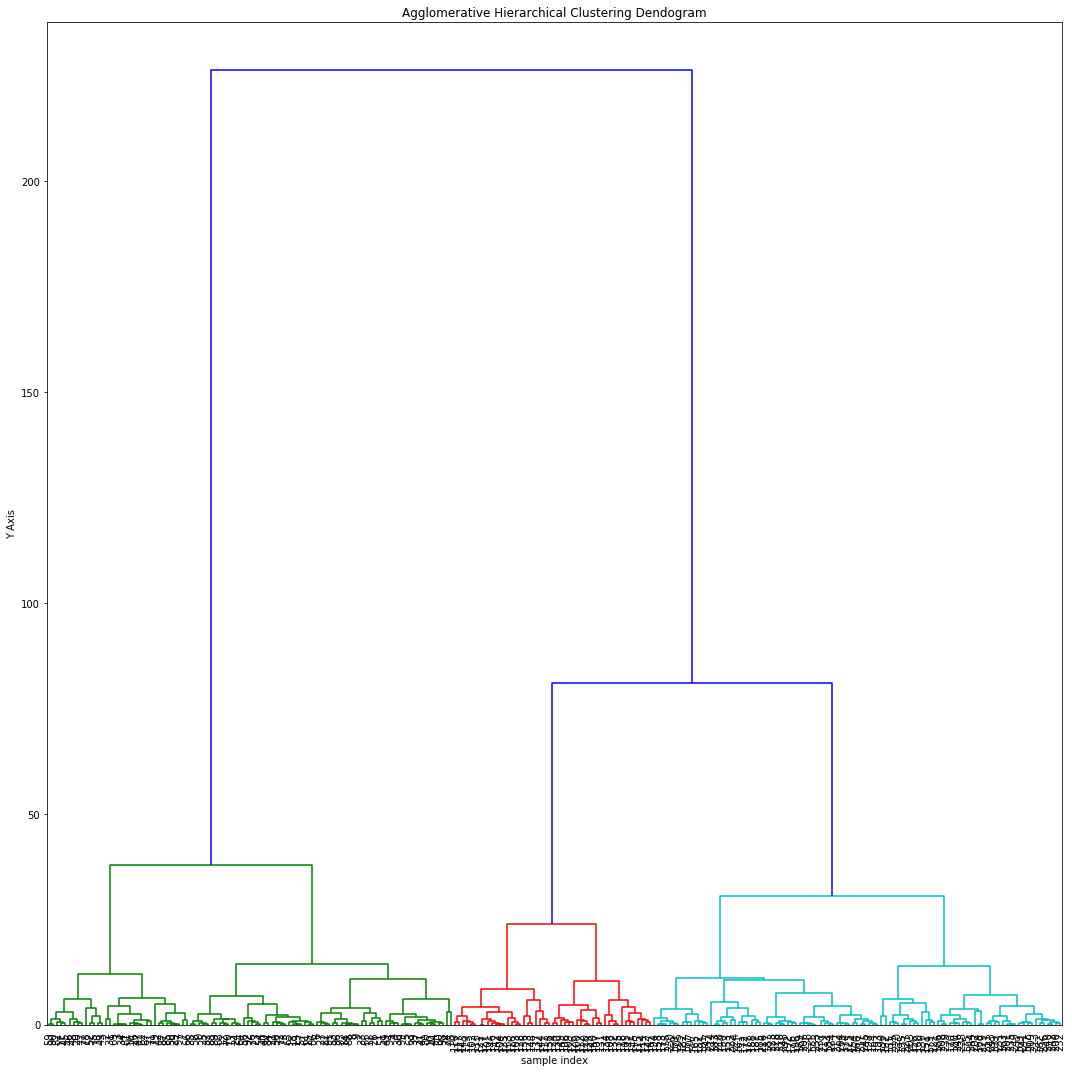

In [193]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Y Axis')
dendrogram(Z, leaf_rotation=90.,color_threshold=60,  leaf_font_size=10. )
plt.tight_layout()

### 11. Recreate the dendrogram for last 3 merged clusters 

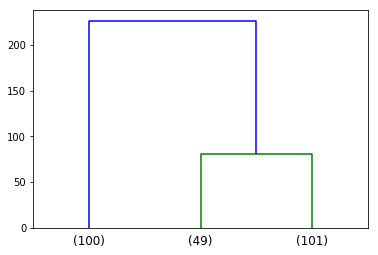

In [194]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 12. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [197]:
 # Fom the above diagram 60 is the optimal distance between the clusters.

### 13. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [207]:
import scipy.cluster.hierarchy as sch
d = sch.distance.pdist(a_df) 
print(d)

[3.59033369 7.34425329 5.51144005 ... 3.4093526  3.94422625 4.61331975]


In [237]:
sch.fcluster(Z, 0.5*d.max(), criterion='distance')

array([2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 4, 4,
       4, 3, 4, 4, 3, 3, 3, 6, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4, 5, 6, 5, 5,
       5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6,
       5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6,
       5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 5, 6], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010F118D0>,
      dtype=object)

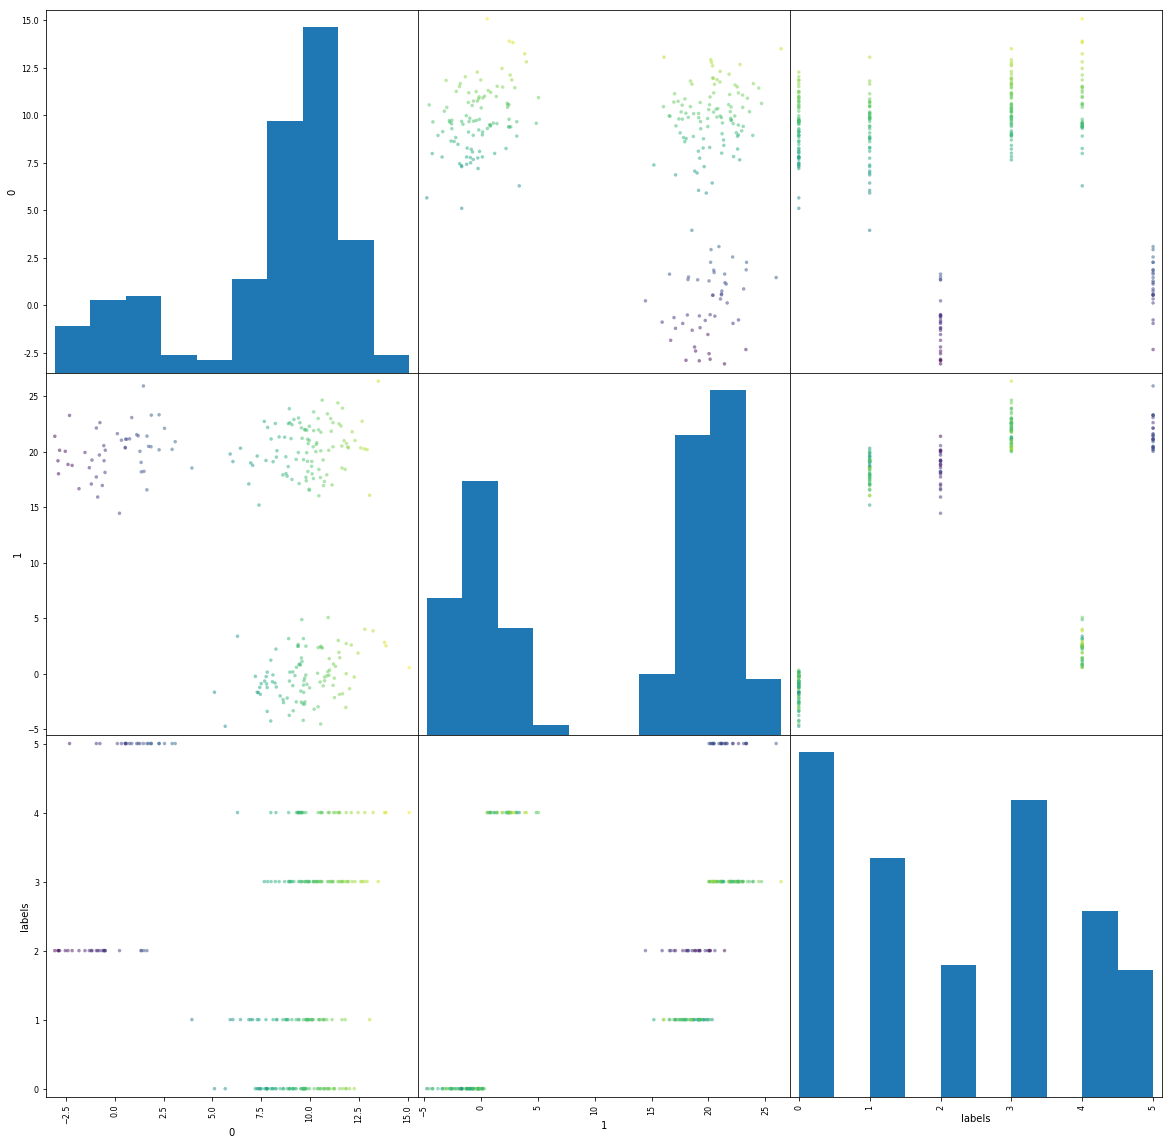

In [235]:
scatter_matrix(a_df, c=a_df[0], figsize=(20, 20), s=50)


In [234]:
a_df.head()

,0,1,labels
0,9.976369,-1.265302,0
1,7.984123,-4.252181,0
2,9.576366,4.881084,4
3,10.549720,2.482663,4
4,7.752350,-0.250266,0
